<a href="https://colab.research.google.com/github/bloyal/Deep-Learning-with-Python/blob/main/Deep_Learning_With_Python_Chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

## Constant tensors and Variables

In [ ]:
x = tf.ones(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.zeros([2,1])
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.random.normal([3,1], mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.04074255]
 [-0.86131895]
 [-0.92778087]], shape=(3, 1), dtype=float32)


In [ ]:
x = tf.random.uniform([3,1], minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.8034723 ]
 [0.46863544]
 [0.97719336]], shape=(3, 1), dtype=float32)


In [ ]:
import numpy as np

Tf tensors aren't assignable, like Numpy arrays

In [ ]:
x = np.ones(shape=(2,2))
print(x)
x[0,0] = 2
print(x)

[[1. 1.]
 [1. 1.]]
[[2. 1.]
 [1. 1.]]


In [ ]:
x = tf.ones([2,2])
x[0,0]=2

TypeError: ignored

Need to create a tf.Variable instead

In [ ]:
v = tf.Variable(initial_value=tf.random.normal([3,1]))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.3999954 ],
       [ 0.67826897],
       [-0.68156683]], dtype=float32)>


In [ ]:
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

Doing math in TensorFlow

In [ ]:
a = tf.ones((2,2)) * 2
print (a)
b = tf.square(a)
print(b)
c = tf.sqrt(b)
print(c)
d = b + c
print(d)
e = tf.matmul(a,b)
print(e)
e *= d
print(e)

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[6. 6.]
 [6. 6.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[16. 16.]
 [16. 16.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[96. 96.]
 [96. 96.]], shape=(2, 2), dtype=float32)


## GradientTape API

(In this example, result = X^2 and gradient = 2*X)

In [ ]:
input_var = tf.Variable(initial_value=3.)
print(input_var)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>
tf.Tensor(6.0, shape=(), dtype=float32)


Watching constant tensor inputs

In [ ]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(input_const)
print(gradient)

tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


Computing second-order gradients (i.e. second derivatives)

In [ ]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print("Time is {time:.2f}".format(time=2))
print(speed)
print(position)
print(acceleration)

Time is 2.00
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


## E2E linear classifier in pure TF

Create some random data

In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0,3], cov=[[1, 0.5],[0.5,1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3,0], cov=[[1, 0.5],[0.5,1]], size=num_samples_per_class)
print(negative_samples)
print(positive_samples)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
print(inputs)

[[-2.33882937  2.41639849]
 [-0.90609198  3.08401176]
 [ 0.98994403  5.10001438]
 ...
 [-0.88342235  1.0872762 ]
 [ 0.42730425  2.54146549]
 [ 0.73674857  4.55353703]]
[[ 3.08179803 -1.35761034]
 [ 2.12731715 -0.82112862]
 [ 3.17570556 -0.23723698]
 ...
 [ 1.91428053 -0.97611883]
 [ 2.28122322  0.35519827]
 [ 3.35230567 -0.40217616]]
[[-2.3388293   2.4163985 ]
 [-0.906092    3.0840118 ]
 [ 0.98994404  5.100014  ]
 ...
 [ 1.9142805  -0.9761188 ]
 [ 2.2812233   0.35519826]
 [ 3.3523057  -0.40217617]]


Generate target labels

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                     np.ones((num_samples_per_class, 1), dtype='float32')))
print(targets)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


Plot input data

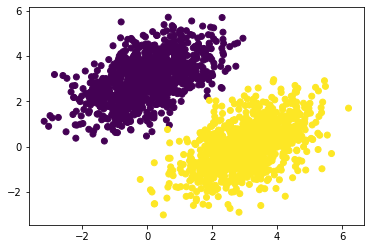

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

Create the variables needed for the linear classifier

In [ ]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
print(W) # (2x1 vector of starting weights)
print(b) # (Scalar bias value)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.28127086],
       [0.8216218 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


Define the forward pass function

In [ ]:
def model(inputs):
  return tf.matmul(inputs, W) + b

Define the loss function

In [ ]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses) # collapse to scalar

Define training function

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions) #Pretty sure this is backwards in book
  #Calculate the gradient of the loss function wrt the weights and bias values
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  #Update the weights and biases, scaled by the learning rate
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

Run training over multiple epochs

In [ ]:
for step in range(20):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 4.0966
Loss at step 1: 0.4322
Loss at step 2: 0.1661
Loss at step 3: 0.1207
Loss at step 4: 0.1075
Loss at step 5: 0.0995
Loss at step 6: 0.0928
Loss at step 7: 0.0868
Loss at step 8: 0.0813
Loss at step 9: 0.0763
Loss at step 10: 0.0718
Loss at step 11: 0.0676
Loss at step 12: 0.0638
Loss at step 13: 0.0603
Loss at step 14: 0.0572
Loss at step 15: 0.0543
Loss at step 16: 0.0517
Loss at step 17: 0.0493
Loss at step 18: 0.0471
Loss at step 19: 0.0451


Plot the results

tf.Tensor(
[[-0.48722148]
 [-0.22392309]
 [ 0.03493734]
 ...
 [ 0.7194888 ]
 [ 0.69514215]
 [ 0.9913631 ]], shape=(2000, 1), dtype=float32)


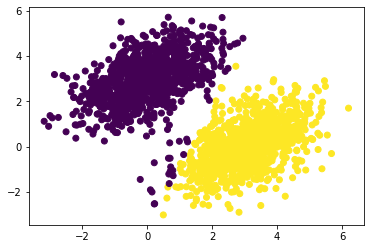

In [ ]:
predictions = model(inputs)
print(predictions)
#Slighly updated from book to convert probabilistic predictions to two categories
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0]>0.5)
plt.show()

Add the classification line

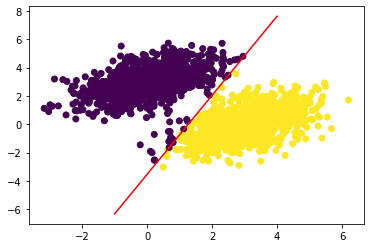

In [ ]:
x = np.linspace(-1,4,100)
y = - W[0]/W[1]*x + (0.5-b)/W[1]
plt.plot(x,y,"-r")
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0]>0.5)

## Using Keras Layers